In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
mani=pd.read_csv("D:\datascience\movies\\movie_ratings.csv")
mani.head()

,Unnamed: 0,movie,year,imdb,metascore,votes
0,0,Gladiator,2000,8.5,67.0,1187559
1,1,Memento,2000,8.5,80.0,1014199
2,2,Snatch,2000,8.3,NaN,707162
3,3,Requiem for a Dream,2000,8.3,68.0,688394
4,4,X-Men,2000,7.4,64.0,526411


In [ ]:
mani.rename(columns={"imdb":"rating"},inplace=True)

In [ ]:
mani.describe()

,Unnamed: 0,year,rating,metascore,votes
count,1800.00000,1800.000000,1800.000000,950.000000,1.800000e+03
mean,899.50000,2008.495556,7.239444,74.280000,3.176363e+05
std,519.75956,5.183780,0.818280,9.065475,2.151333e+05
min,0.00000,2000.000000,4.100000,61.000000,9.342800e+04
25%,449.75000,2004.000000,6.700000,67.000000,1.842225e+05
50%,899.50000,2008.500000,7.300000,73.000000,2.467390e+05
75%,1349.25000,2013.000000,7.800000,81.000000,3.825830e+05
max,1799.00000,2017.000000,9.900000,100.000000,2.020298e+06


In [ ]:
mani.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1800 non-null   int64  
 1   movie       1800 non-null   object 
 2   year        1800 non-null   int64  
 3   rating      1800 non-null   float64
 4   metascore   950 non-null    float64
 5   votes       1800 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 84.5+ KB


In [ ]:
mani["year"].value_counts()

year
2011    102
2007    102
2000    100
2001    100
2015    100
2014    100
2013    100
2012    100
2010    100
2009    100
2008    100
2005    100
2004    100
2003    100
2002    100
2017    100
2006     98
2016     98
Name: count, dtype: int64

In [ ]:
mani.movie.value_counts()

movie
Hannibal                                      4
Daredevil                                     4
Fantastic Four                                4
The Hobbit: An Unexpected Journey             2
The Artist                                    2
                                             ..
Pirates of the Caribbean: Dead Man's Chest    2
Dexter                                        2
Pan's Labyrinth                               2
Casino Royale                                 2
The Disaster Artist                           2
Name: count, Length: 897, dtype: int64

In [ ]:
mani["rating"].unique()

array([8.5, 8.3, 7.4, 7.8, 7.6, 7.3, 7. , 6.1, 6.5, 7.9, 7.2, 7.1, 6.2,
       6.7, 6.6, 8.1, 6.4, 5.5, 7.7, 7.5, 5.7, 5.6, 5.9, 8. , 6.8, 8.8,
       8.2, 8.6, 9.5, 6.9, 8.4, 5.8, 6.3, 5.3, 8.7, 9.3, 9. , 8.9, 9.2,
       6. , 4.9, 9.4, 5.2, 5. , 4.7, 4.1, 4.3, 9.9])

In [ ]:
mani.count

<bound method DataFrame.count of       Unnamed: 0                          movie  year  rating  metascore  \
0              0                      Gladiator  2000     8.5       67.0   
1              1                        Memento  2000     8.5       80.0   
2              2                         Snatch  2000     8.3        NaN   
3              3            Requiem for a Dream  2000     8.3       68.0   
4              4                          X-Men  2000     7.4       64.0   
...          ...                            ...   ...     ...        ...   
1795        1795  Transformers: The Last Knight  2017     5.2        NaN   
1796        1796                     Mindhunter  2017     8.5        NaN   
1797        1797          The Lego Batman Movie  2017     7.3       75.0   
1798        1798            The Handmaid's Tale  2017     8.6        NaN   
1799        1799            The Disaster Artist  2017     7.4       76.0   

        votes  
0     1187559  
1     1014199  
2     

In [ ]:
top_3=mani.sort_values(by="rating",ascending=False).reset_index(drop=True).tail()
top_3

,Unnamed: 0,movie,year,rating,metascore,votes
1795,925,The Twilight Saga: New Moon,2009,4.7,NaN,245496
1796,1546,Fantastic Four,2015,4.3,NaN,137778
1797,1596,Fantastic Four,2015,4.3,NaN,137778
1798,1568,Fifty Shades of Grey,2015,4.1,NaN,274536
1799,1518,Fifty Shades of Grey,2015,4.1,NaN,274536


In [ ]:
df3=mani["movie"].value_counts().reset_index()
df3

,movie,count
0,Hannibal,4
1,Daredevil,4
2,Fantastic Four,4
3,The Hobbit: An Unexpected Journey,2
4,The Artist,2
...,...,...
892,Pirates of the Caribbean: Dead Man's Chest,2
893,Dexter,2
894,Pan's Labyrinth,2
895,Casino Royale,2


In [ ]:
df3.describe()

,count
count,897.000000
mean,2.006689
std,0.115534
min,2.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,4.000000


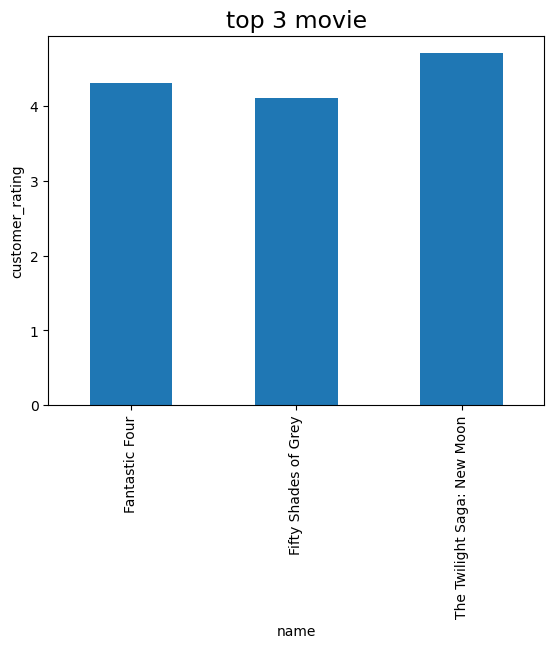

In [ ]:
top_3.groupby("movie")["rating"].mean().plot.bar()
plt.ylabel("customer_rating")
plt.xlabel("name")
plt.title("top 3 movie",fontsize=17)
plt.show()

In [ ]:
df4 = pd.DataFrame(mani.groupby(by=['movie'])['votes'].sum()
                   .reset_index(name='votes'))
df4.sort_values(by=['votes'], ascending=False).reset_index(drop=True).head(10)

,movie,votes
0,The Dark Knight,4040596
1,Inception,3599390
2,The Lord of the Rings: The Fellowship of the Ring,2957566
3,The Lord of the Rings: The Return of the King,2924236
4,Game of Thrones,2820562
5,The Dark Knight Rises,2723164
6,The Lord of the Rings: The Two Towers,2644220
7,Interstellar,2520356
8,Gladiator,2375118
9,Django Unchained,2368898


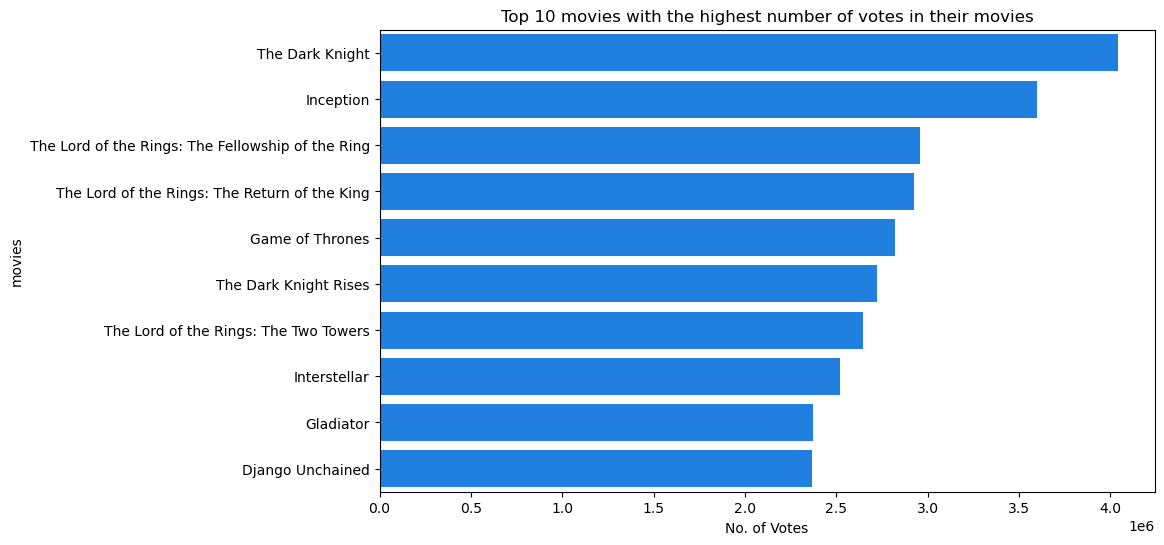

In [ ]:
df4_vis = df4.sort_values(by=['votes'], ascending=False).reset_index(drop=True).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='votes', y='movie',data=df4_vis,   orient='h',
            order=df4_vis['movie'], color='#007FFF')
plt.xlabel('No. of Votes')
plt.ylabel('movies')
plt.title('Top 10 movies with the highest number of votes in their movies')
plt.show()

In [ ]:
mani["votes"].value_counts()

votes
189762     4
1187559    2
712476     2
215514     2
215060     2
          ..
631620     2
604556     2
588327     2
563084     2
106238     2
Name: count, Length: 899, dtype: int64

In [ ]:
bavi=mani.drop(["movie","Unnamed: 0"],axis=1)
bavi

,year,rating,metascore,votes
0,2000,8.5,67.0,1187559
1,2000,8.5,80.0,1014199
2,2000,8.3,NaN,707162
3,2000,8.3,68.0,688394
4,2000,7.4,64.0,526411
...,...,...,...,...
1795,2017,5.2,NaN,113918
1796,2017,8.5,NaN,111213
1797,2017,7.3,75.0,111193
1798,2017,8.6,NaN,106329


<Axes: >

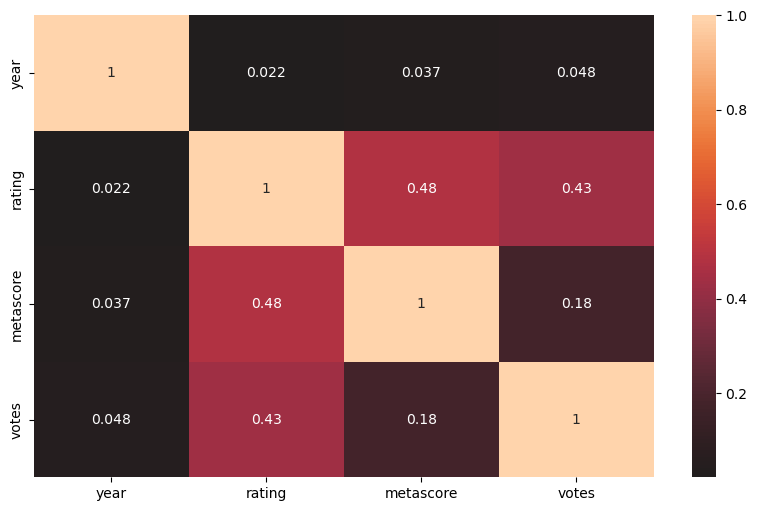

In [ ]:
fig=plt.subplots(figsize=(10,6))
sns.heatmap(bavi.corr(),center=0,annot=True)

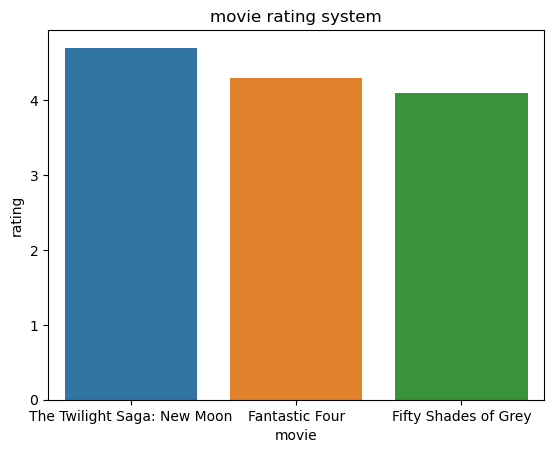

In [ ]:
sns.barplot(x="movie",y="rating",data=top_3)
plt.title("movie rating system")
plt.show()
